# Understanding Housing Prices

## Introduce the Problem/Dataset

### Housing is anything but a calm market, and as the son of a mother who works in a realty team, I often hear about how stressful and chaotic it can be at times. So to honor her, I'll use this project to look into it. The market is a dynamic and and complex system influenced by a wide range of factors, including economic trends, location desirability, interest rates, and even social behaviors. Understanding these factors and predicting housing prices can give us a lot of insight into the future. As a hopeful future house owner, this is very important to me!

## What is Regression and How Does it Work?

### Regression is a method used in machine learning to predict relationships between variables. It uses independent variables, the input, to model the output, or dependent variable. Linear regression is the most common form of it, and is used when there is a linear relationship between input and output. You might have seen the equation 'y = mx + b' in your math classes, and that is one of the most famous examples of linear regression. 

## Understanding the Data

### Before diving into any visualizations just yet, I wanted to get a better understanding of just what type of data I'd be working with and what type of information I could possibly extract from it. In order to do this, I first looked at both the test.csv and train.csv files, specifically all the different types of features that could be used for my project. Some features of interest were total lot area, sale condition and sale price, year built, and year sold. I've noticed that some features with correlations are the sale price and overall quality of the house, for example total rooms above grid.

## Preprocessing

### I want to compare value of houses across time, and houses without a sale date won't mean anything to my data if they can't fit on a timeline. So, I needed to make sure that the data was complete, and to my pleasant surprise it was! Each value had a corresponding year (2006-2010) and month (1-12) value, so I should be able to make conclusions on that front without any problem. I also wanted to take a look at the effect of season on the price, or even just see the distribution based on time periods.

## Experiment 1

### For the first visualization, I wanted to make a simple graph showing the spread of house prices based on year built. My prediction for this experiment is that newer houses will sell at a higher price, and this may be due to a couple of factors, like better utilities, overall quality, the foundation, and more abstract things like the lot it was built on or where it's located. 


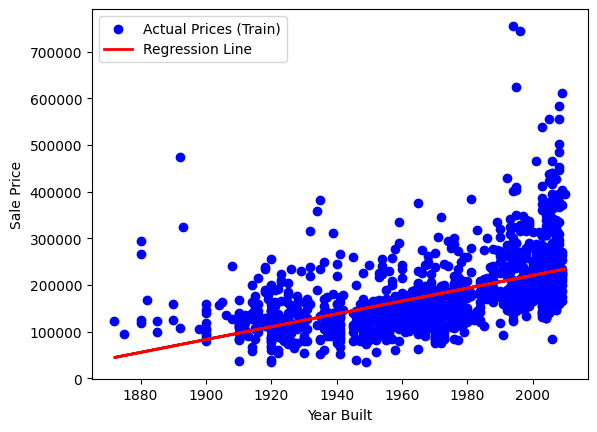

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

X_train = train_df[['YearBuilt']]
y_train = train_df['SalePrice']

X_test = test_df[['YearBuilt']]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test dataset
test_df['PredictedSalePrice'] = model.predict(X_test)


# Plot regression line using training data
plt.scatter(X_train, y_train, color="blue", label="Actual Prices (Train)")
plt.plot(X_train, model.predict(X_train), color="red", linewidth=2, label="Regression Line")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.legend()
plt.show()


## Experiment 2

### For my second experiment, I wanted to look at how many different features, like overall quality, can  of house affects price. The features I chose to visualize (other than overall quality) were above ground living area, lot area, garage area, and year built. I think that each of these factors will be significant but I expect overall quality to be one of the best. 

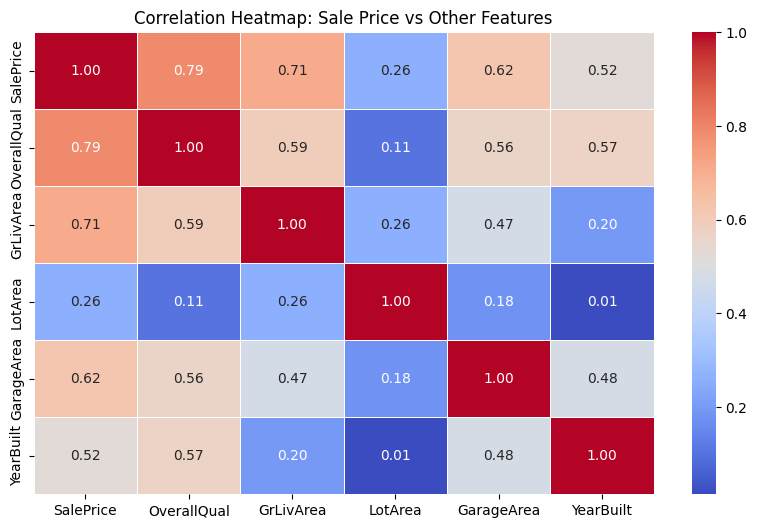

In [14]:
# Scatter plots for multiple features vs. SalePrice

import seaborn as sns

# Select key features for correlation analysis
corr_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'LotArea', 'GarageArea', 'YearBuilt']
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Sale Price vs Other Features")
plt.show()



### What we can gather from this is that overall quality is the strongest factor, but other features like square footage and garage size also play a role. The correlation heatmap confirms this. I also think that using a multi-feature regression model like this helps predict Sale Price more accurately than using a single factor.

## Experiment 3

### For this experiment, I wanted to check out the effect of season on the price of house. I can vaguely remember hearing my mom talk about the craziness of the market during summer, so I expect this visualization to back that up. At the very least, I believe there will be a significant effect on prices season by season.

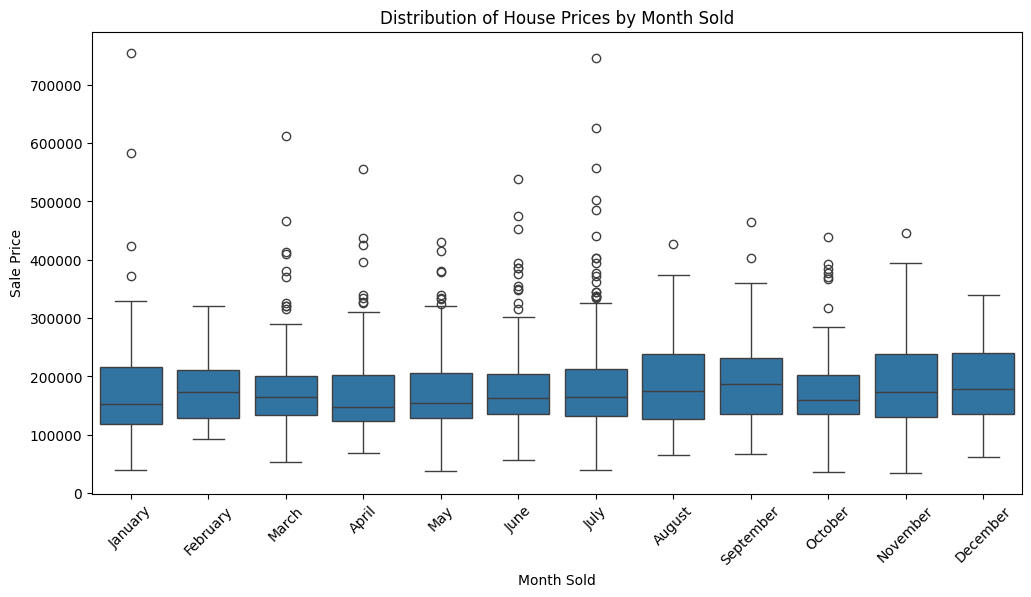

In [25]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Convert numerical month to text
train_df['MoSold'] = train_df['MoSold'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# First Graph: Sale Price by Month Sold
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['MoSold'], y=train_df['SalePrice'], order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.xlabel("Month Sold")
plt.ylabel("Sale Price")
plt.title("Distribution of House Prices by Month Sold")
plt.xticks(rotation=45)
plt.show()


### From this experiment, I noticed that as the year goes on starting spring until late summer, the mean price of houses creeps up slowly but steaily, which supports the hypothesis I made according to my mom's words! The lower mean prices in the winter alos suggest that people might be more willing to negotiate on the price, as compared to the summer. 

## Impact

### The impact of this project on me personally has been something of a lesson, and I will be sure to use what I've learned, as well as some advice from my mom, when it's time for me to look at houses. Prices have also risen steadily over time, so if I were to make the investment, it would be wise to make it now rather than later. 

## Conclusion

### This project was very fun, and allowed me to learn a little bit more about what goes into housing as a market and how prices are determined. I think being able to use multiple different visualizations gave me a lot of different insights into my concerning experiments.